### Importing libraries

In [1]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#Constant
Random_state = 107  #DOB = 01/07

### Loading Dataset iris and ionosphere

In [2]:
iris = load_iris()
iono = np.genfromtxt("ionosphere.txt", delimiter=",", names=True, dtype=None)

### Splitting the datasets

In [3]:
# iris data
X_iris = iris["data"]
Y_iris = iris["target"]

# ionosphere data
X_iono = np.genfromtxt("ionosphere.txt", delimiter=",", usecols=np.arange(34))
Y_iono = np.genfromtxt("ionosphere.txt", delimiter=",", usecols=34, dtype='int')

### KNN Algorithm

In [4]:
# Defining an algorithm function
        
def run_KNN(X, Y, neighbours = 1): #default neighbour being 1
    #user cannot use less than 1 as a neighbour.
    if neighbours < 1:
        k = 1
    else:
        k = neighbours
    
    accuracy = 0
    
        #Splitting into train and test data using train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=Random_state)
    
    p_list = [] # A list to append predicted values later on
    #Training train and test with the help of euclidean distances.
    for i in range(len(X_test)):
        ed = []     # A list to append the collection of euclidean distances.
        for j in range(len(X_train)):
            ed.append([np.sqrt(np.sum(np.power(X_test[i,:] - X_train[j,:], 2))), j]) #Using math functions to find euclidean distance
        
        for m in range(len(ed)):
            for n in range(len(ed)-1):
                if ed[n] > ed[n+1]:
                    ed[n], ed[n+1] = ed[n+1], ed[n] #Sorting 
                    
        targets = [Y_train[ed[r][1]] for r in range(k)]
        p_list.append(max(targets, key=targets.count))
        
    accuracy = np.mean(p_list == Y_test)
        
    return accuracy

### Test error rate for iris and ionosphere when k=1

In [5]:
#iris
iris_accuracy = run_KNN(X_iris, Y_iris, neighbours = 1)
print("test error rate of iris dataset", 1-iris_accuracy)

test error rate of iris dataset 0.0


In [6]:
#iono
iono_accuracy = run_KNN(X_iono, Y_iono, neighbours = 0.7)
print("test error rate of ionosphere dataset", 1-iono_accuracy)

test error rate of ionosphere dataset 0.14150943396226412


### Test error rate for iris and ionosphere when k=3

In [7]:
#iris
iris_accuracy = run_KNN(X_iris, Y_iris, neighbours = 3)
print("test error rate of iris dataset", 1-iris_accuracy)

test error rate of iris dataset 0.0


In [8]:
#ionosphere
iono_accuracy = run_KNN(X_iono, Y_iono, neighbours = 3)
print("test error rate of ionosphere dataset", 1-iono_accuracy)

test error rate of ionosphere dataset 0.15094339622641506


### Plots for both iris and ionosphere data

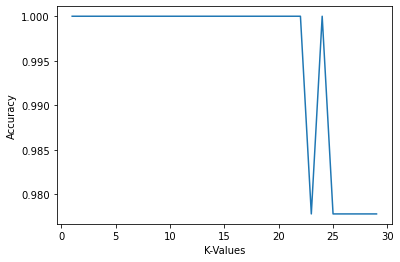

In [9]:
k_neighbors = list(range(1,30))
accuracy_scores = [run_KNN(X_iris, Y_iris, neighbours=s) for s in k_neighbors]

plt.plot(k_neighbors, accuracy_scores)
plt.xlabel("K-Values")
plt.ylabel("Accuracy")
plt.show()

 Maybe different random_state would show a different accuracy and test error rates.

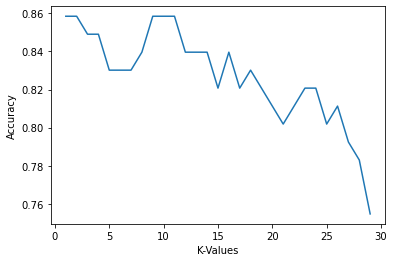

In [10]:
k_neighbors = list(range(1,30))
accuracy_scores = [run_KNN(X_iono, Y_iono, neighbours=s) for s in k_neighbors]

plt.plot(k_neighbors, accuracy_scores)
plt.xlabel("K-Values")
plt.ylabel("Accuracy")
plt.show()

In [11]:
#This divide function will tackle our problem of different conventions later on
def divide(num, denom):

    if num and denom == 0:
        return 0
    elif num == 0:
        return 0
    elif denom == 0:
        return math.inf
    else:
        return num/denom

### Conformal Prediction

In [12]:
#Defining a function for Conformity score

def conformity_score(X, Y, i, j, label) :
    #Splitting into train and test data using train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=Random_state)
    #Concatenating training set 
    X_train_concat = np.concatenate((X_train, Y_train[:,None]), axis = 1)
    #Adding one test set from X_test
    X_test_a = np.concatenate((X_test[i:i+1], label[j:j+1,None]), axis = 1)
    #Concatenating one test set and training set
    X_concat = np.concatenate((X_train_concat, X_test_a))
    #Y of training set and one test set
    Y_concat = np.concatenate((Y_train, label[j:j+1]))
    
    score = np.zeros(X_concat.shape[0])
    
    for m in range(X_concat.shape[0]):
        same_class = []
        diff_class = []
        
        for n in range(X_concat.shape[0]):
            if m!=1:
                
                if X_concat[m,:-1]==Y_concat[n]:
                    same_class.append(np.sqrt(np.sum(np.power(X_concat[m,:-1] - X_train[n,:-1]))))
                    
                else:
                    diff_class.append(np.sqrt(np.sum(np.power(X_concat[m,:-1] - X_train[n,:-1]))))
                    
        # Conformity measure of distance between sample of diff class by sample of a same class 
        score[m] = divide(min(diff_class), min(same_class))
        
    return score  

In [13]:
#p_value function
def p_val(score):
    rank = 0
    for m in range(score.shape[0]):
    
        if score[m]<=score[-1]:
            rank+=1
    p_value = divide(rank, score.shape[0])
    
    return p_value 

In [14]:
#False_p function

Sorry, Couldn't go further as i was out of time.

### Attempted

* Implemented Nearest Neighbour algorithm(general K) for both iris and ionosphere.

* Implemented KNN for both K=1, K=3 and provided with test error rates(random_state being 107 provided such results with no test error for iris initially)

* Added plots to guage Accuracy with an increase in K

* Added a divide function as to deal with conventions 0/0, 1/0, 0/1 later on.

* Tried my hands at Conformal Predictor.

### Inferences

* The accuracy and test error rates is dependent on the random_state we chose

* Iris dataset show us less changees in accuracy with a change in k(maybe because of the dataset itself being so small)